In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("dataset.csv")

In [4]:
data.head()

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
0,mlm,b28abb42,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4
1,mlm,438b5c4d,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3
2,mlm,8e6e4f31,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
3,mlm,5e0956a6,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
4,mlm,b9f4b40c,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7


Проверка размера датасета и наличия пропущенных значений.

In [5]:
data.shape

(319, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repository_name  319 non-null    object
 1   commit_hash      319 non-null    object
 2   commit_date      319 non-null    object
 3   commit_author    319 non-null    object
 4   commit_message   319 non-null    object
 5   bugs             319 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 15.1+ KB


In [7]:
data.repository_name.unique()

array(['mlm', 'standard', 'agent', 'conductor', 'dockers', 'sensor'],
      dtype=object)

In [8]:
data.commit_author.unique()

array(['Victor', 'Peggy', 'Wendy', 'Trudy', 'Mallory', 'Eve', 'Dabe',
       'Carol', 'Bob', 'Alice'], dtype=object)

In [9]:
data.commit_hash.unique().size

319

In [10]:
data.commit_message.unique().size

309

В commit_hash и commit_message практически все значения уникальны, поэтому они не будут использоваться в обучении модели. Также не будет использована commit_date.

repository_name и commit_author - категориальные переменные, для дальнейшей работы они будут преобразованы в фиктивные переменные.

In [11]:
categorical_columns = data[['repository_name', 'commit_author']]


In [12]:
categorical_columns.head()

,repository_name,commit_author
0,mlm,Victor
1,mlm,Victor
2,mlm,Victor
3,mlm,Victor
4,mlm,Victor


In [13]:
enc = LabelEncoder()

In [14]:
for column in categorical_columns:
    data[column] = enc.fit_transform(categorical_columns[column])
data.head()

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
0,3,b28abb42,2020-06-12T14:26:12,8,объяснения предсказаний с помощью lime,4
1,3,438b5c4d,2020-06-12T11:53:10,8,Поставил lime вместо eli5,3
2,3,8e6e4f31,2020-06-11T15:19:03,8,Скрипт для создния пакетов обновления,4
3,3,5e0956a6,2020-06-11T10:42:29,8,Сортировка весов по убыванию,3
4,3,b9f4b40c,2020-06-11T09:25:19,8,не надо конвертировать массив до операции по с...,7


In [15]:
data = data.drop(['commit_hash', 'commit_message', 'commit_date'], axis = 1)

In [16]:
data

,repository_name,commit_author,bugs
0,3,8,4
1,3,8,3
2,3,8,4
3,3,8,3
4,3,8,7
...,...,...,...
314,4,3,1
315,4,3,2
316,4,3,3
317,4,3,1


Матрицу корреляции позволит измерить линейные отношения между переменными.

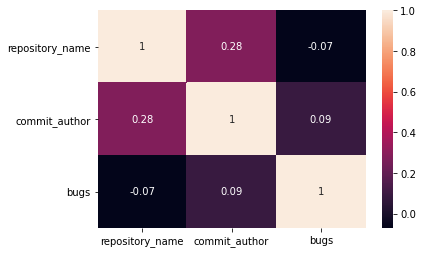

In [17]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Проверка переменных на наличие линейной взаимосвязи.

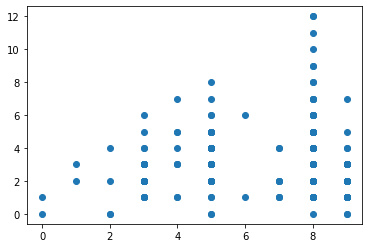

In [18]:
plt.scatter(data.commit_author, data.bugs)

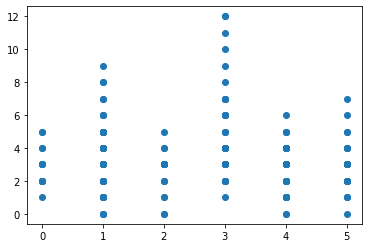

In [19]:
plt.scatter(data.repository_name, data.bugs)

In [20]:
data = pd.get_dummies(data, columns=["commit_author", "repository_name"])

In [21]:
data.shape

(319, 17)

Создадим датасеты с признаками и целевой переменной.

In [22]:
X = data.drop(['bugs'], axis =1)

In [23]:
y = data.bugs

Для обучения модели данные разбиваются на тестовое и тренировочное множества.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

В качестве модели выбран SGDRegressor

In [25]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)

In [26]:
linear_regression_model.fit(X_train, y_train)

SGDRegressor(tol=0.0001)

In [27]:
train_predictions = linear_regression_model.predict(X_train) 
test_predictions = linear_regression_model.predict(X_test)

Для оценки модели использованы MSE и R2-показатель.

In [28]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

print("Train R2: {}".format(train_r2))
print("Test R2: {}".format(test_r2))

Train MSE: 2.7949981286187464
Test MSE: 1.9930828861109031
Train R2: 0.2657169901831915
Test R2: 0.25451799905652106


Недостаточный R2 обусловлен использованием признаков, коррелирующих с целевой переменной незначительно.
Для улучшения результата целесообразно использовать commit_date. Добавим его в датасет.

In [29]:
data1 = pd.read_csv('dataset.csv')

In [30]:
data = data.join(data1.commit_date)

In [31]:
data.head()

,bugs,commit_author_0,commit_author_1,commit_author_2,commit_author_3,commit_author_4,commit_author_5,commit_author_6,commit_author_7,commit_author_8,commit_author_9,repository_name_0,repository_name_1,repository_name_2,repository_name_3,repository_name_4,repository_name_5,commit_date
0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2020-06-12T14:26:12
1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2020-06-12T11:53:10
2,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2020-06-11T15:19:03
3,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2020-06-11T10:42:29
4,7,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2020-06-11T09:25:19


In [32]:
import datetime

In [33]:
data['day'] = pd.to_datetime(data.commit_date)

In [34]:
data['time'] = data['day'].dt.time

In [35]:
data.sort_values(by='time', inplace=True)

In [36]:
data.head()

,bugs,commit_author_0,commit_author_1,commit_author_2,commit_author_3,commit_author_4,commit_author_5,commit_author_6,commit_author_7,commit_author_8,commit_author_9,repository_name_0,repository_name_1,repository_name_2,repository_name_3,repository_name_4,repository_name_5,commit_date,day,time
44,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2020-05-18T06:04:34,2020-05-18 06:04:34,06:04:34
71,3,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2020-06-08T07:54:27,2020-06-08 07:54:27,07:54:27
68,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2020-05-01T08:02:33,2020-05-01 08:02:33,08:02:33
17,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2020-06-10T08:34:15,2020-06-10 08:34:15,08:34:15
287,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2020-04-07T08:35:25,2020-04-07 08:35:25,08:35:25


Для преобразования временного ряда в признак использовано скользящее среднее.

In [37]:
data['rolling_window'] = data['bugs'].rolling(2).mean()

In [38]:
data = data.fillna(3.5)

In [39]:
data.head()

,bugs,commit_author_0,commit_author_1,commit_author_2,commit_author_3,commit_author_4,commit_author_5,commit_author_6,commit_author_7,commit_author_8,...,repository_name_0,repository_name_1,repository_name_2,repository_name_3,repository_name_4,repository_name_5,commit_date,day,time,rolling_window
44,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,2020-05-18T06:04:34,2020-05-18 06:04:34,06:04:34,3.5
71,3,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,2020-06-08T07:54:27,2020-06-08 07:54:27,07:54:27,4.5
68,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2020-05-01T08:02:33,2020-05-01 08:02:33,08:02:33,3.0
17,2,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,2020-06-10T08:34:15,2020-06-10 08:34:15,08:34:15,2.5
287,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,2020-04-07T08:35:25,2020-04-07 08:35:25,08:35:25,2.0


Удалим ненужные столбцы.

In [40]:
data = data.drop(['commit_date', 'day', 'time'], axis = 1)

In [41]:
data.head()

,bugs,commit_author_0,commit_author_1,commit_author_2,commit_author_3,commit_author_4,commit_author_5,commit_author_6,commit_author_7,commit_author_8,commit_author_9,repository_name_0,repository_name_1,repository_name_2,repository_name_3,repository_name_4,repository_name_5,rolling_window
44,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3.5
71,3,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,4.5
68,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.0
17,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2.5
287,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0


In [42]:

dat_cor = pd.DataFrame(data['bugs']).join(data.rolling_window)

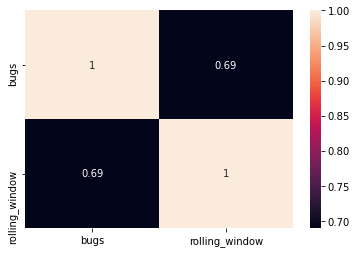

In [43]:
correlation_matrix = dat_cor.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Целевая функция сильно коррелирует с новым признаком.

In [44]:
X = data.drop(['bugs'], axis =1)
y = data.bugs

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [46]:
linear_regression_model.fit(X_train, y_train)

SGDRegressor(tol=0.0001)

In [47]:
train_predictions = linear_regression_model.predict(X_train) 
test_predictions = linear_regression_model.predict(X_test)

In [48]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

print("Train R2: {}".format(train_r2))
print("Test R2: {}".format(test_r2))

Train MSE: 1.5989448616098902
Test MSE: 1.7030065942578383
Train R2: 0.4609709509111376
Test R2: 0.6099120931832697


Добавление признака, сильно коррелирующего с целевой переменной, позволило улучшить показатели и получить приемлемую модель.